#### [DataSet Download Link](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import glob
from sklearn.model_selection import train_test_split
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
# def load_data(data_path, target_size=(128,128)):
#     image_to_arr = []
#     filelist_img = glob.glob(data_path+"*.png")
#     image_paths = sorted(filelist_img)
#     for image_path in image_paths:
#         try:
#             image = cv2.imread(image_path)
#             image = cv2.resize(image, dsize=target_size)
#             image_to_arr.append(image)
#         except (RuntimeError , TypeError ,NameError) as e: 
#             print(e)
         
#     return np.asarray(image_to_arr) 

In [26]:
!ls

drive  sample_data


In [27]:
!unzip -q "/content/drive/My Drive/cell_images-20200423T110603Z-001.zip"

unzip:  cannot find or open /content/drive/My Drive/cell_images-20200423T110603Z-001.zip, /content/drive/My Drive/cell_images-20200423T110603Z-001.zip.zip or /content/drive/My Drive/cell_images-20200423T110603Z-001.zip.ZIP.


In [28]:
!ls "drive/My Drive/cell_images/"

Parasitized  un


In [29]:
p = Path("drive/My Drive/cell_images/Parasitized/")
image_to_arr = []
images = p.glob('*.png')
for image_path in images:
  img = image.load_img(image_path , target_size = (128,128))
  img = image.img_to_array(img)
  image_to_arr.append(img)
print(len(image_to_arr))

13779


In [30]:
p = Path("drive/My Drive/cell_images/un/Uninfected")
Uninfected = []
images = p.glob('*.png')
for image_path in images:
  img = image.load_img(image_path , target_size = (128,128))
  img = image.img_to_array(img)
  Uninfected.append(img)
print(len(Uninfected))

12812


In [0]:
infected = np.asarray(image_to_arr) 
Uninfected = np.asarray(Uninfected)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

# Creating Dataset. Stacking the infected and uninfected
dataset = np.vstack((Uninfected, infected))

In [34]:
infected_label = np.zeros(infected.shape[0])      # giving 0 to infected and 1 to Uninfected
print(infected_label.shape)                       # printing shape
Uninfected_label = np.ones(Uninfected.shape[0])
print(Uninfected_label.shape)

(13779,)
(12812,)


In [0]:
labels = np.zeros(infected.shape[0]+Uninfected.shape[0])       # Combining Labels
labels[:infected.shape[0]] = infected_label  
labels[infected.shape[0]:] = Uninfected_label

In [36]:
labels.shape

(26591,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataset,labels,test_size=0.1,random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

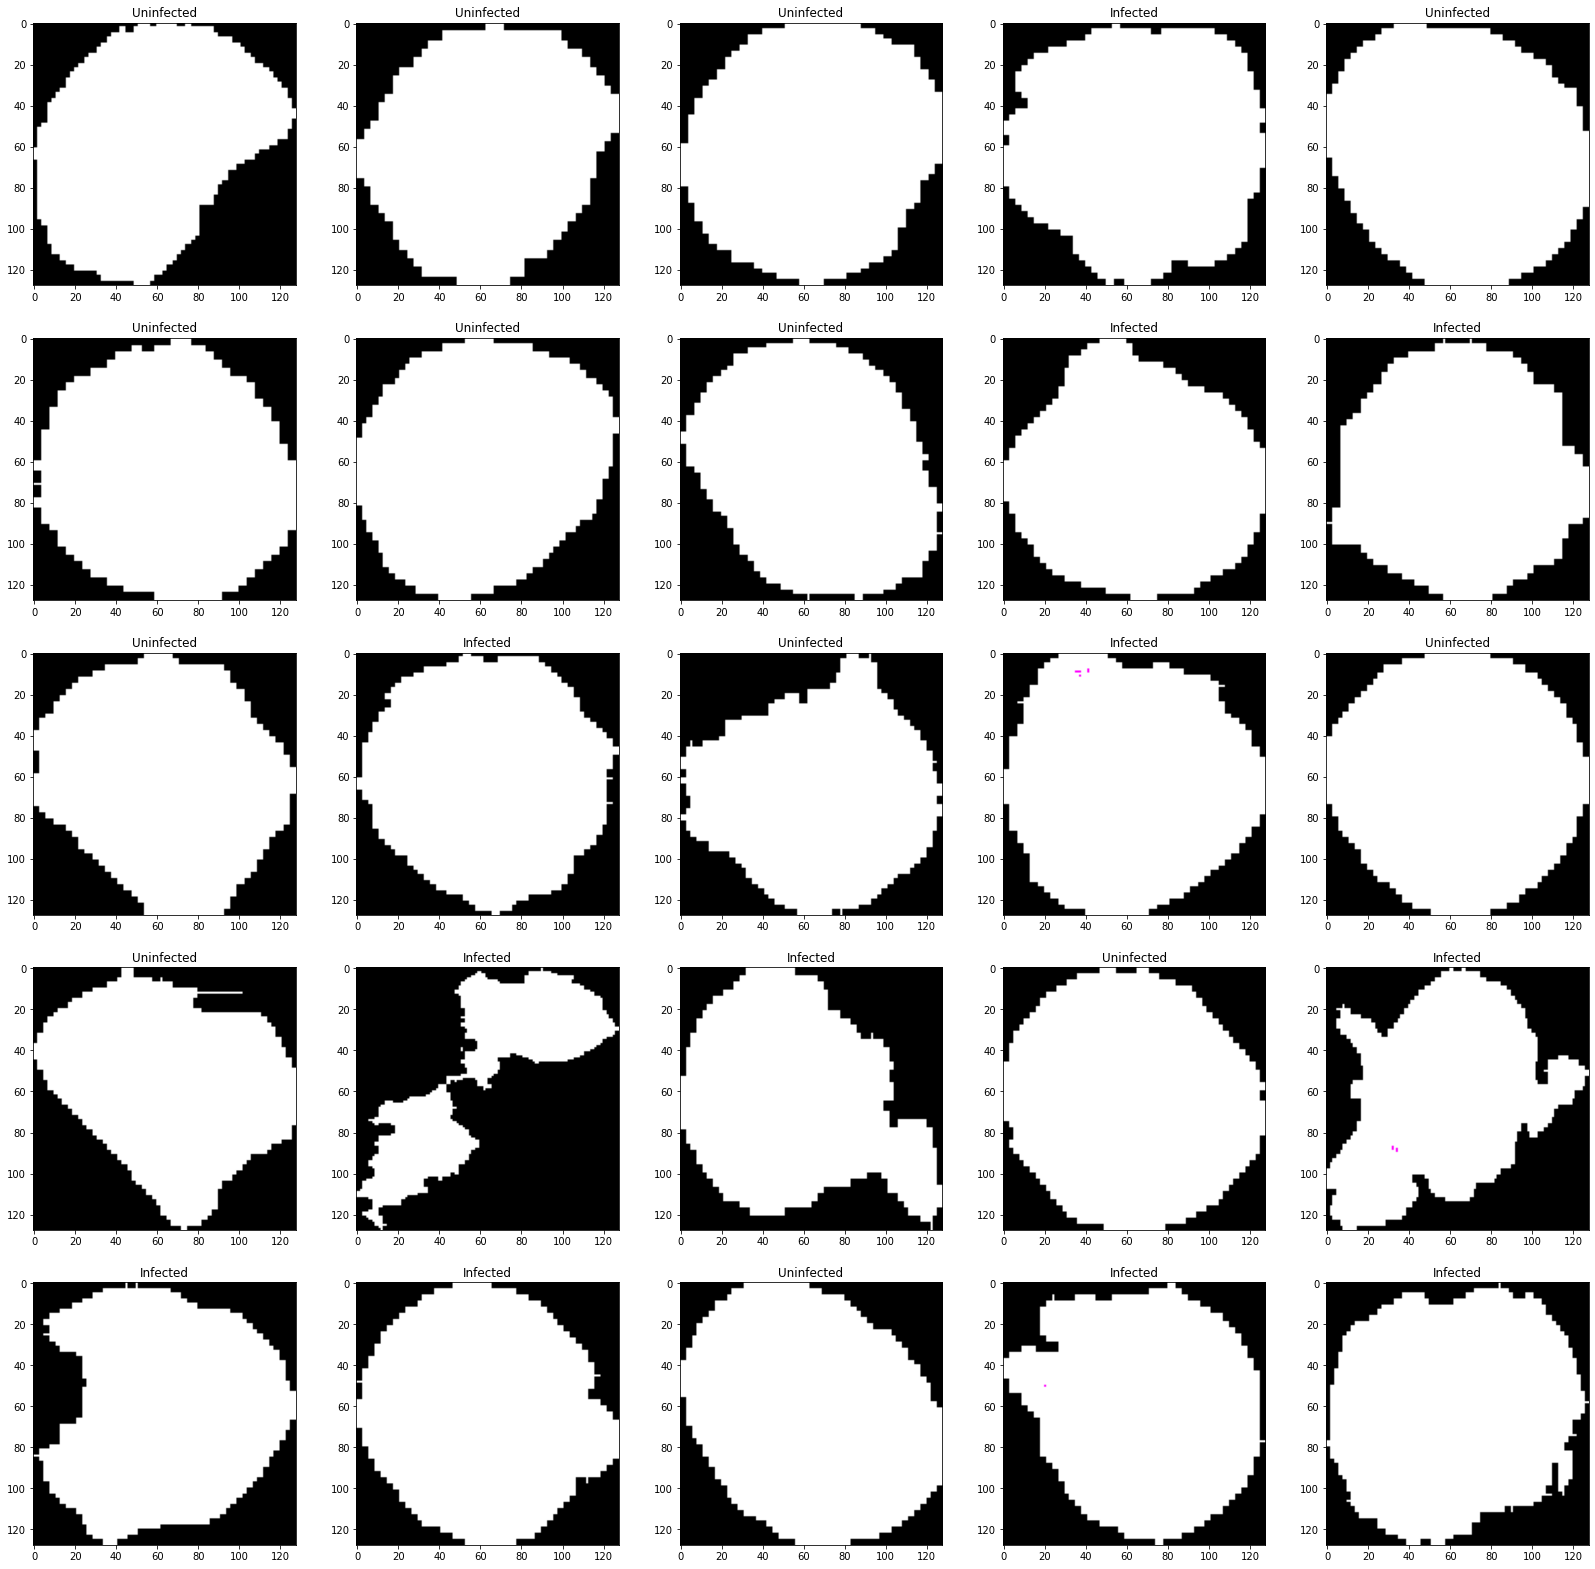

In [38]:
# Plotting Cell Images
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Uninfected')
    else:
        plt.title('Infected')
    
plt.show()

In [39]:
input_shape = (128, 128, 3)

# Creating Model
model = Sequential()

model.add(Conv2D(16, kernel_size=3, padding="same", input_shape=input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [40]:
hist = model.fit(X_train, y_train,
                shuffle=True,
                batch_size=512,
                 epochs=20,
                 validation_data=(X_test,y_test)
                )

Train on 23931 samples, validate on 2660 samples
Epoch 1/20
23931/23931 [==============================] - 192s 8ms/step - loss: 1.6679 - accuracy: 0.5129 - val_loss: 0.6929 - val_accuracy: 0.5173
Epoch 2/20
23931/23931 [==============================] - 190s 8ms/step - loss: 0.6996 - accuracy: 0.5182 - val_loss: 0.6927 - val_accuracy: 0.5173
Epoch 3/20
23931/23931 [==============================] - 191s 8ms/step - loss: 0.6948 - accuracy: 0.5175 - val_loss: 0.6927 - val_accuracy: 0.5173
Epoch 4/20
23931/23931 [==============================] - 192s 8ms/step - loss: 0.6910 - accuracy: 0.5165 - val_loss: 0.6721 - val_accuracy: 0.5173
Epoch 5/20
23931/23931 [==============================] - 190s 8ms/step - loss: 0.6759 - accuracy: 0.5221 - val_loss: 0.6585 - val_accuracy: 0.5165
Epoch 6/20
23931/23931 [==============================] - 190s 8ms/step - loss: 0.6630 - accuracy: 0.5606 - val_loss: 0.6244 - val_accuracy: 0.6492
Epoch 7/20
23931/23931 [==============================] - 190s 

In [41]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [0]:
def plot_loss():
    print(hist.history.keys())
    plt.figure()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='upper left')
    plt.show()
    
    plt.figure()
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


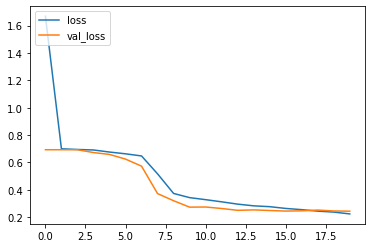

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [43]:
plot_loss()

In [0]:
a=model.predict_classes(dataset[1].reshape((-1,128,128,3)))

In [52]:
print(a)

[[0]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PREDICTION=infected


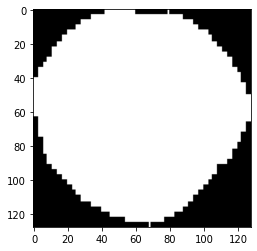

In [55]:
plt.imshow(dataset[1])
if(a==0):
  print("PREDICTION=infected")
else:
  print("PREDICTION=uninfected")
